# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
color = sns.color_palette()
#%matplotlib inline
from scipy import stats

# Reading and Analyzing Data

In [2]:
#Reading Training Data

In [ ]:
pd.read_csv

In [ ]:
train = pd.read_csv('C:/Users/Jiamin_Xiao/Desktop/PTA/zillow/data/zillow-prize-1/train_2016_v2.csv', parse_dates=["transactiondate"])
print ("Shape Of Train: ",train.shape)
train.head()

Shape Of Train:  (90275, 3)


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [4]:
#Reading Properties Data

In [ ]:
prop = pd.read_csv('C:/Users/Jiamin_Xiao/Desktop/PTA/zillow/data/zillow-prize-1/properties_2016.csv')
print ("Shape Of Train: ",prop.shape)
prop.head()

C:\Users\Jiamin_Xiao\Anaconda3_new\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Shape Of Train:  (2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [5]:
#Merging both files to create final dataset

In [ ]:
train = pd.merge(train, prop, on='parcelid', how='left')
print ("Shape Of Train: ",train.shape)
train.head()

In [7]:
#Checking data dictionary

In [ ]:
dict = pd.read_excel('C:/Users/Jiamin_Xiao/Desktop/PTA/zillow/data/zillow-prize-1/zillow_data_dictionary.xlsx')
dict

In [9]:
#Checking data type of Variables

In [10]:
train.dtypes

parcelid                                 int64
logerror                               float64
transactiondate                 datetime64[ns]
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsquarefeet6                    float64
fips                                   float64
fireplacecnt                           float64
fullbathcnt  

In [11]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,53
2,datetime64[ns],1
3,object,5


# Missing Values Analysis

In [15]:
#Checking the number of Nulls in this new merged dataset.

In [16]:
train.isnull().sum(axis=0).reset_index()

,index,0
0,parcelid,0
1,logerror,0
2,transactiondate,0
3,airconditioningtypeid,61494
4,architecturalstyletypeid,90014
5,basementsqft,90232
6,bathroomcnt,0
7,bedroomcnt,0
8,buildingclasstypeid,90259
9,buildingqualitytypeid,32911


In [13]:
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train.shape[0]
missing_df = missing_df.sort_values(by='missing_count', ascending=False)
missing_df

,column_name,missing_count,missing_ratio
8,buildingclasstypeid,90259,0.999823
15,finishedsquarefeet13,90242,0.999634
43,storytypeid,90232,0.999524
5,basementsqft,90232,0.999524
48,yardbuildingsqft26,90180,0.998948
51,fireplaceflag,90053,0.997541
4,architecturalstyletypeid,90014,0.997109
45,typeconstructiontypeid,89976,0.996688
18,finishedsquarefeet6,89854,0.995336
11,decktypeid,89617,0.992711


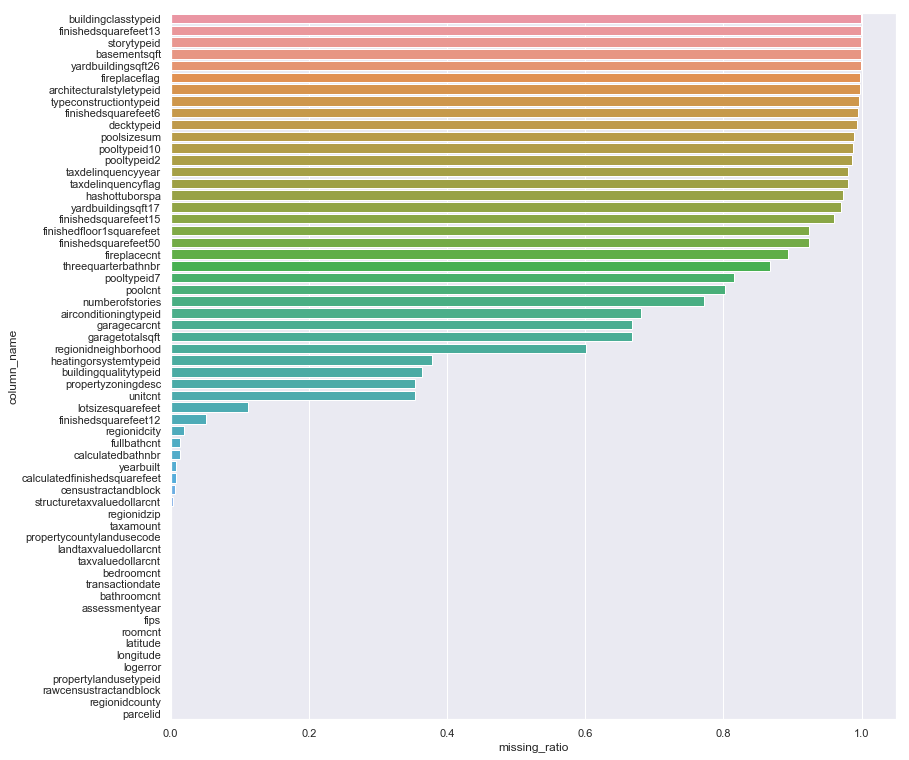

In [14]:
sns.set(rc={'figure.figsize':(13,13)})
sns.barplot(data=missing_df, x='missing_ratio', y='column_name')

In [48]:
# Printing Columns who's %age of NaN values is greater than 70%

In [15]:
missing_df.ix[missing_df['missing_ratio']>0.70].reset_index()

C:\Users\Jiamin_Xiao\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,index,column_name,missing_count,missing_ratio
0,8,buildingclasstypeid,90259,0.999823
1,15,finishedsquarefeet13,90242,0.999634
2,43,storytypeid,90232,0.999524
3,5,basementsqft,90232,0.999524
4,48,yardbuildingsqft26,90180,0.998948
5,51,fireplaceflag,90053,0.997541
6,4,architecturalstyletypeid,90014,0.997109
7,45,typeconstructiontypeid,89976,0.996688
8,18,finishedsquarefeet6,89854,0.995336
9,11,decktypeid,89617,0.992711


In [56]:
#Dropping Columns who's %age of NaN values is greater than 70%

In [16]:
drop_col = list(missing_df[missing_df['missing_ratio']>0.7].column_name)

In [17]:
train.drop(drop_col, axis=1,inplace=True)
train.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,...,96370.0,0.0,1.0,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,3.5,4.0,NaN,3.5,2263.0,2263.0,...,96962.0,0.0,NaN,2014.0,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
2,12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,...,96293.0,0.0,1.0,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.0,2.0,839.0,839.0,...,96222.0,0.0,1.0,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,2.5,4.0,NaN,2.5,2283.0,2283.0,...,96961.0,8.0,NaN,1981.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13


# Correlation Analysis

In [18]:
# Correlation Matrix

In [19]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

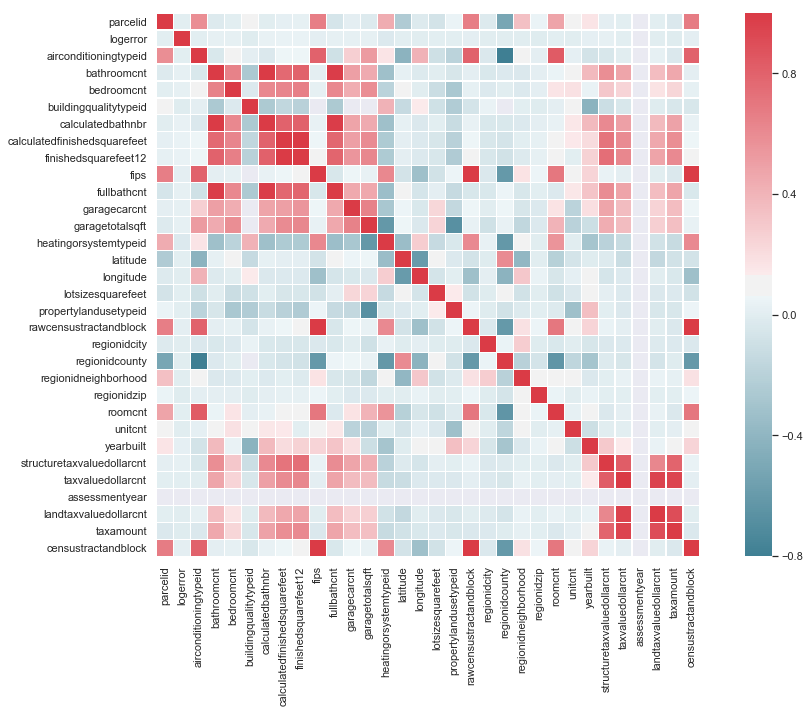

In [20]:
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(), fmt="d", cmap=cmap,  square=True, linewidths=.5)

In [21]:
drop_cor = ['calculatedbathnbr','fullbathcnt','finishedsquarefeet12','rawcensustractandblock','censustractandblock','landtaxvaluedollarcnt','taxvaluedollarcnt']
train.drop(drop_cor, axis=1, inplace=True)

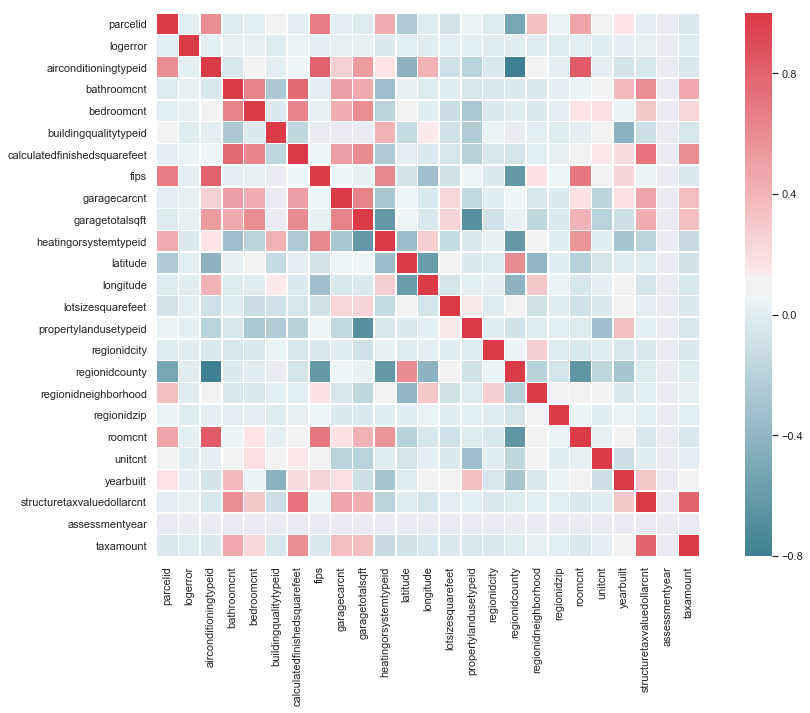

In [22]:
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(), fmt="d", cmap=cmap,  square=True, linewidths=.5)

# Logerror Analysis

In [23]:
#logerror: log(Zestimate) - log(Saleprice). So a positive logerror means Zestimate is overestimating the Saleprice, 
#a negative logerror means that Zestimate is underestimating Saleprice.

In [26]:
#logerror

C:\Users\Jiamin_Xiao\Anaconda3_new\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


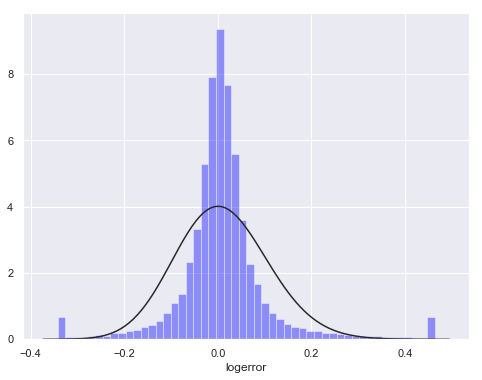

In [24]:
ulimit = np.percentile(train.logerror.values, 99)
llimit = np.percentile(train.logerror.values, 1)
train['logerror'].loc[train['logerror']>ulimit] = ulimit
train['logerror'].loc[train['logerror']<llimit] = llimit
plt.figure(figsize=(8,6))
sns.distplot(train.logerror.values, bins=50, kde=False, fit=stats.gamma, color='Blue')
plt.xlabel('logerror', fontsize=12)
plt.show()

In [27]:
#logerror change over time

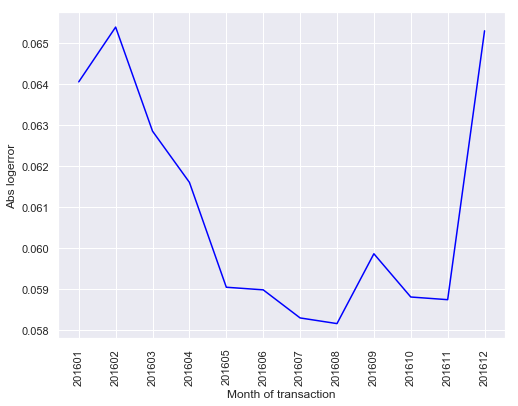

In [28]:
train['transaction_month'] = train['transactiondate'].apply(lambda x:x.strftime('%Y%m'))
train['abs_logerror'] = abs(train['logerror'])
trans=train.groupby('transaction_month')['abs_logerror'].agg(np.mean)
plt.figure(figsize=(8,6))
sns.lineplot(trans.index, trans.values, color='blue', markers=True)
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Abs logerror', fontsize=12)
plt.show()

# Univariate Analysis

In [ ]:
#Exploring number of transactions in each month.

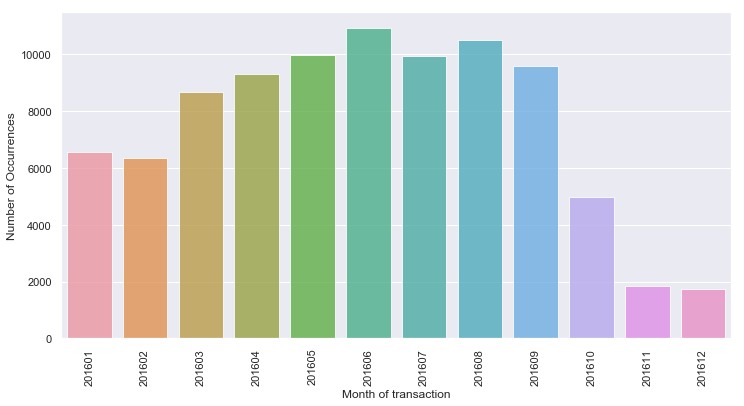

In [17]:
train['transaction_month'] = train['transactiondate'].apply(lambda x:x.strftime('%Y%m'))
cnt_srs = train['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [55]:
#Exploring when were the houses built.

In [ ]:
cnt_yb=train['yearbuilt'].value_counts()
plt.figure(figsize=(8,6))
sns.lineplot(cnt_yb.index, cnt_yb.values, color='Green')
plt.xticks(rotation='vertical')
plt.xlabel('Year of built', fontsize=12)
plt.ylabel('Number of transaction', fontsize=12)
plt.show()

In [ ]:
#Exploring how does the absolute logerror change with build_year?

C:\Users\Jiamin_Xiao\Anaconda3_new\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


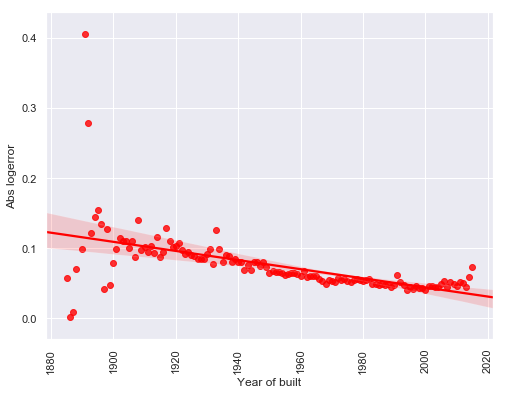

In [95]:
train['abs_logerror'] = abs(train['logerror'])
yearbuilt=train.groupby('yearbuilt')['abs_logerror'].agg(np.mean)
plt.figure(figsize=(8,6))
sns.regplot(yearbuilt.index, yearbuilt.values, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Year of built', fontsize=12)
plt.ylabel('Abs logerror', fontsize=12)
plt.show()

In [ ]:
#Explore the latitude and longitude

C:\Users\Jiamin_Xiao\Anaconda3_new\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Jiamin_Xiao\Anaconda3_new\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

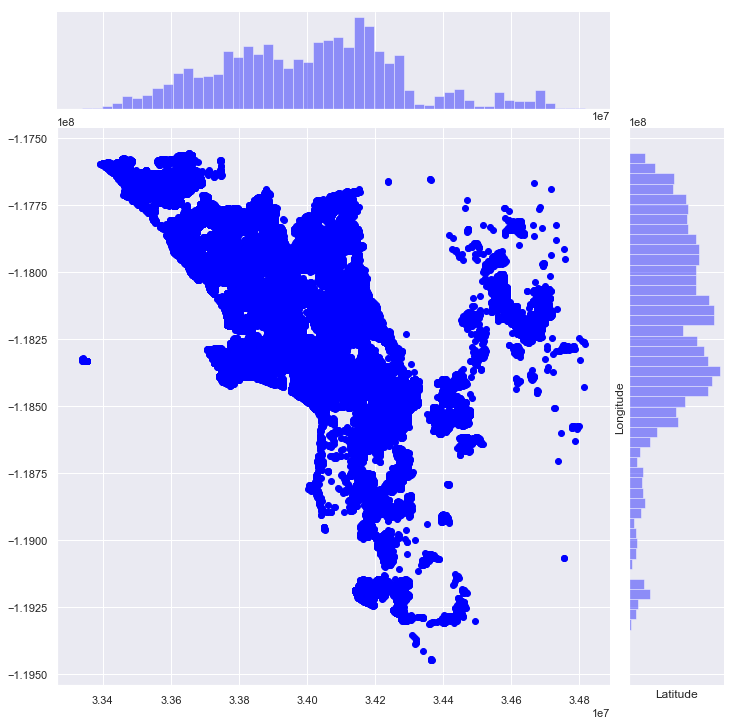

In [83]:
plt.figure(figsize=(10,10))
sns.jointplot(x=train.latitude.values, y=train.longitude.values, size=10, color='blue')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

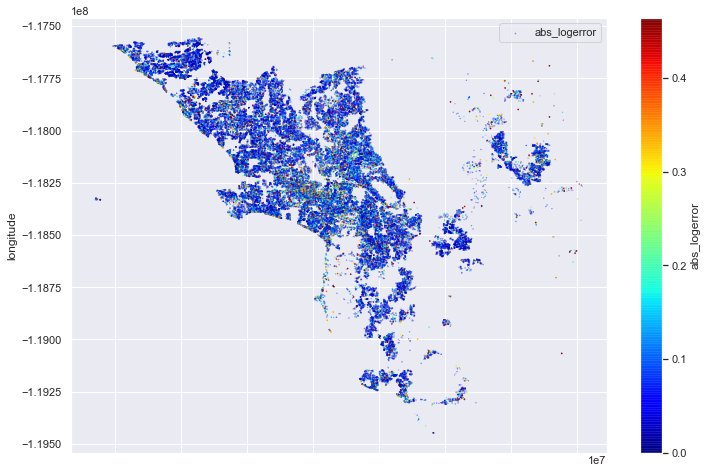

In [32]:
train.plot(kind="scatter", x="latitude", y="longitude",
    s=train['abs_logerror'], label="abs_logerror",
    c='abs_logerror', cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.9, figsize=(12,8),
)
plt.legend()
plt.show()

In [ ]:
#Discrete Variables

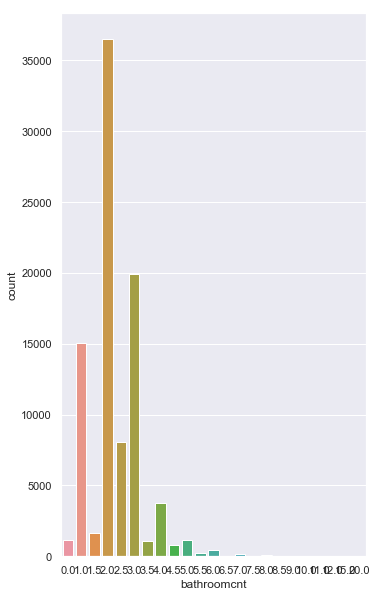

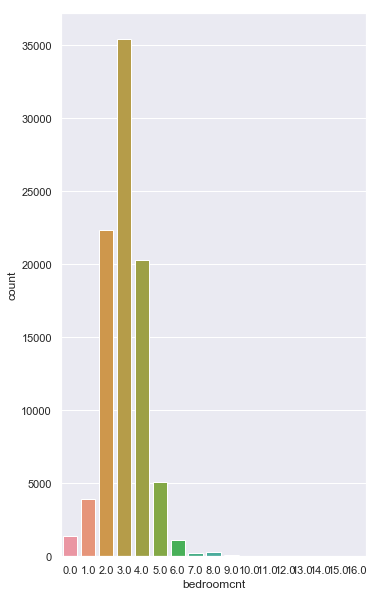

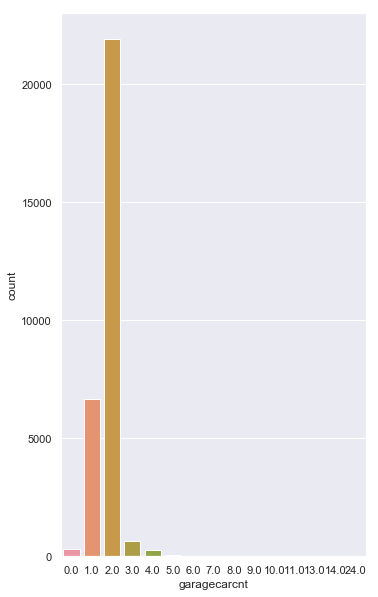

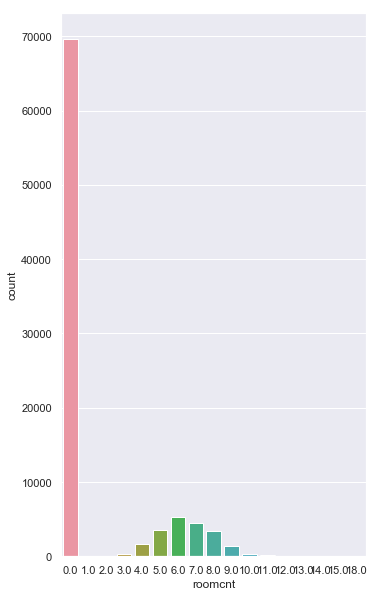

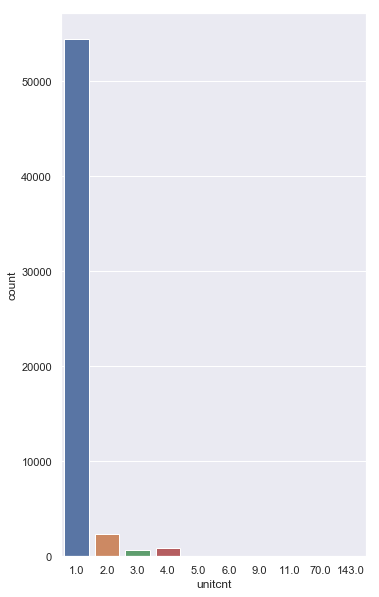

In [103]:
discrete = ['bathroomcnt', 'bedroomcnt','garagecarcnt', 'roomcnt', 'unitcnt']

for col in discrete:
    values = train[col].dropna()   
    fig = plt.figure(figsize=(12,10));
    sns.countplot(x=values, ax = plt.subplot(121));

In [104]:
#Categorical Variables

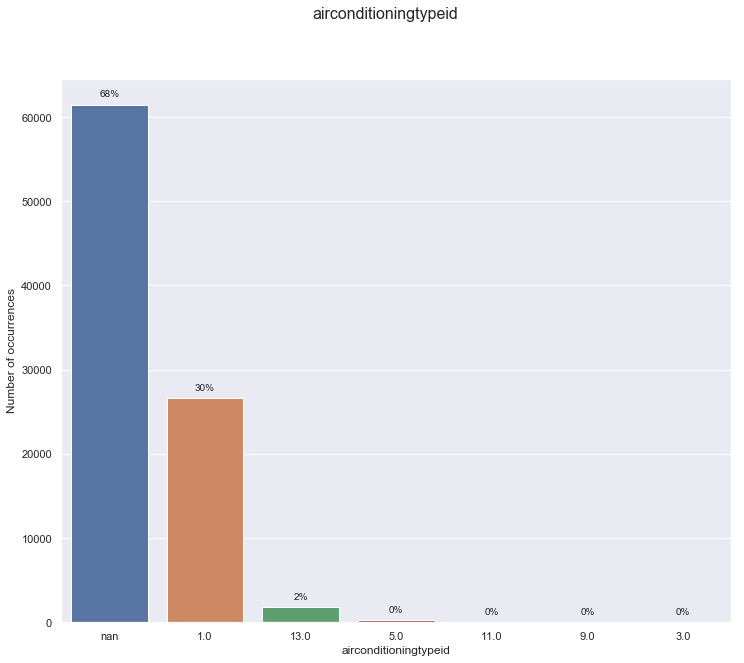

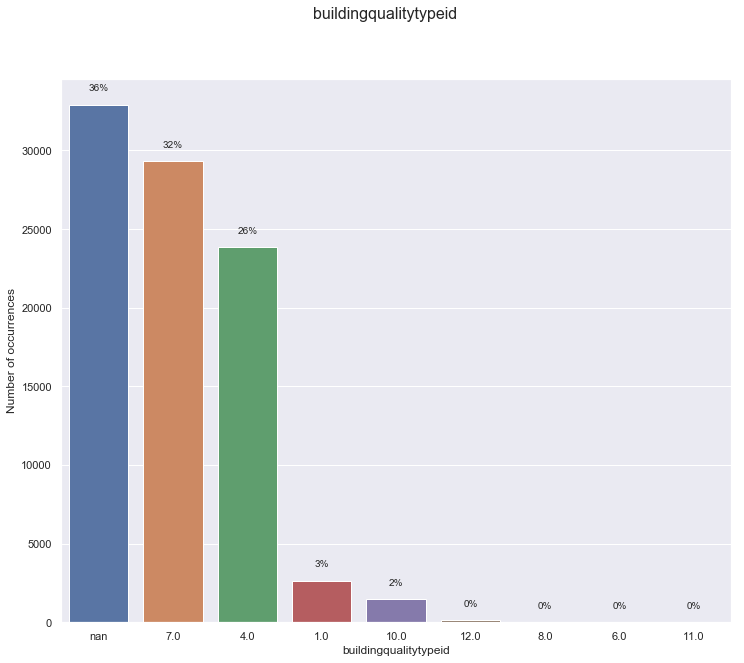

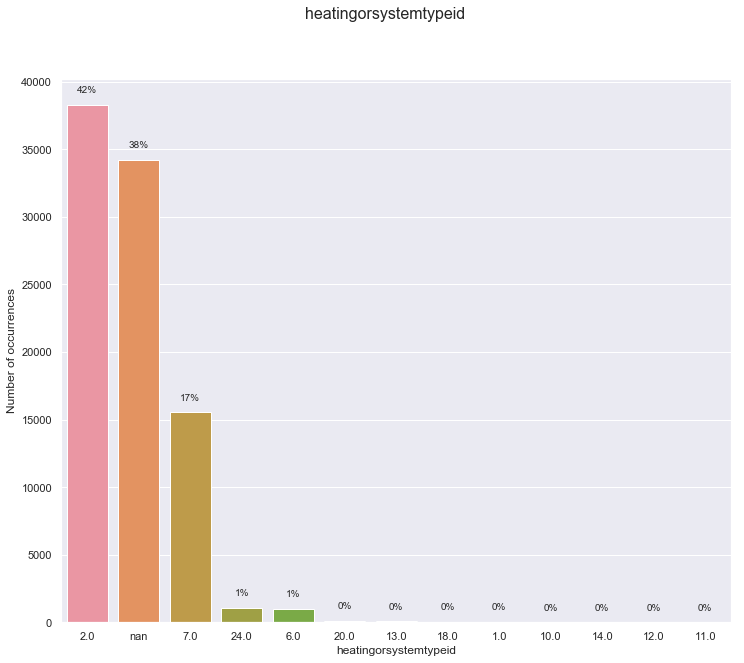

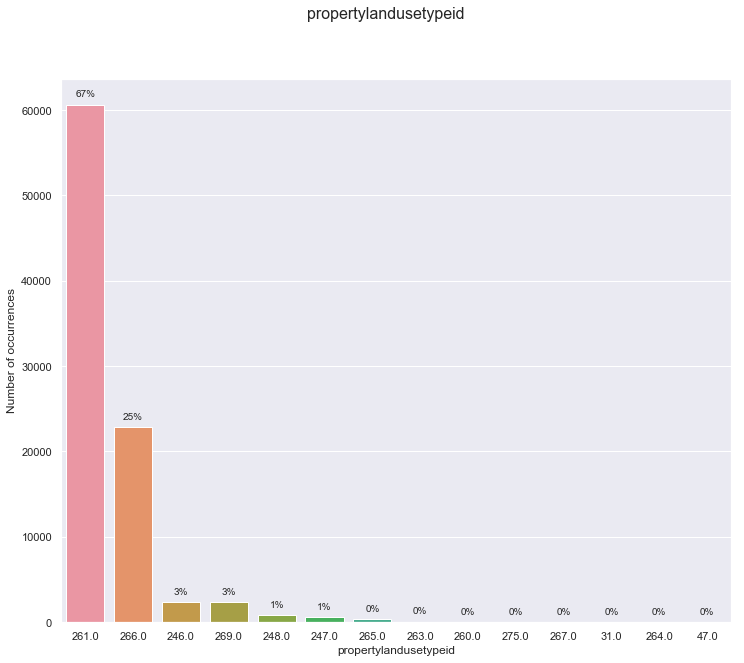

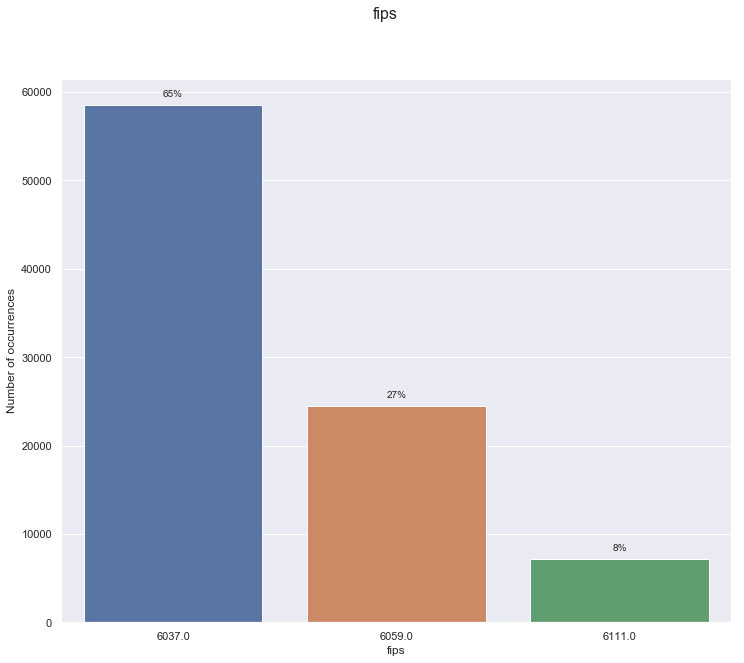

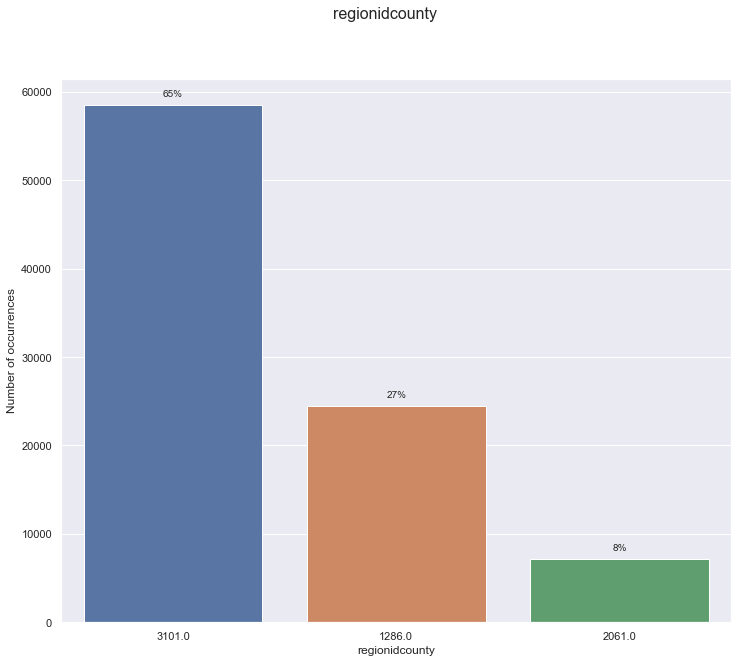

In [107]:
categorical = ['airconditioningtypeid', 'buildingqualitytypeid', 'heatingorsystemtypeid',
               'propertylandusetypeid', 'fips', 'regionidcounty']

### Categorical variable plots
for col in categorical:
    values = train[col].astype('str').value_counts(dropna=False).to_frame().reset_index()
    values.columns = [col, 'counts']
    fig = plt.figure(figsize=(12,10))
    ax = sns.barplot(x=col, y='counts', data=values, order=values[col]);
    plt.xlabel(col);
    plt.ylabel('Number of occurrences')
    plt.suptitle(col, fontsize=16)

    ### Adding percents over bars
    height = [p.get_height() for p in ax.patches]    
    total = sum(height)
    for i, p in enumerate(ax.patches):    
        ax.text(p.get_x()+p.get_width()/2,
                height[i]+total*0.01,
                '{:1.0%}'.format(height[i]/total),
                ha="center")